In [146]:
import json
import numpy as np
import pandas as pd
import collections
import matplotlib.pyplot as plt

In [147]:
my_dict = {}
time_list = [6,24,48]
voll_list = [250,500,1000,3000,5000]

main_path = "/Users/ashutoshshukla/Desktop/TwoStageModel/output_analysis/voll_analysis/"

for i in time_list:
    my_dict[i] = {}    
    t1 = main_path + 'construction_cost_dict_' + str(i) + '.json'
    t2 = main_path + 'voll_dict_' + str(i) + '.json'
    f1 = open(t1) 
    data = json.load(f1)
    my_dict[i]["cons"] = data
    f2 = open(t2) 
    data = json.load(f2)
    my_dict[i]["voll"] = data

In [148]:
bar_dict = {}
for time_value in time_list:
    bar_dict["cons_" + str(time_value)] = []
    bar_dict["voll_" + str(time_value)] = []
    for voll_value in voll_list:
        bar_dict["cons_" + str(time_value)].append(round(my_dict[time_value]["cons"][str(voll_value)]/1e6, 2))
        bar_dict["voll_" + str(time_value)].append(round(my_dict[time_value]["voll"][str(voll_value)]/1e6, 2))

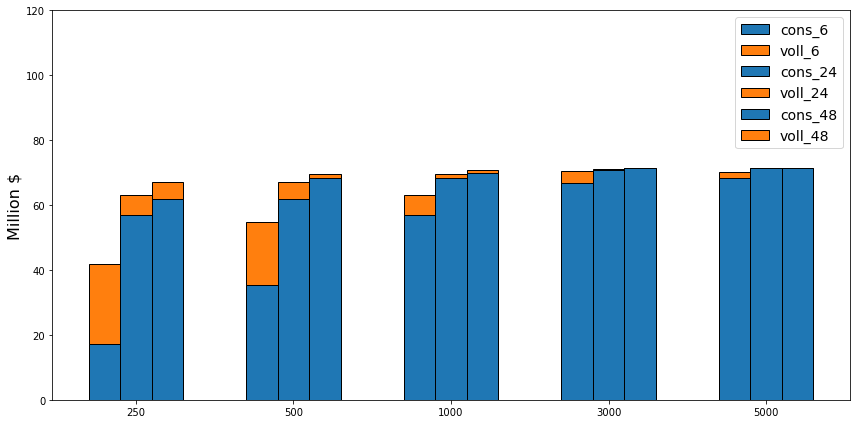

In [149]:
x = np.arange(len(voll_list))
width = 0.2
plot_dict = {}
fig, ax = plt.subplots(figsize=(12, 6))

counter = -0.2
for time_value in time_list:    
    plot_dict["cons_" + str(time_list)] = ax.bar(x + counter, bar_dict["cons_" + str(time_value)], 
                                                 width, label="cons_" + str(time_value), 
                                                 color="tab:blue", edgecolor="black")
    plot_dict["voll_" + str(time_list)] = ax.bar(x + counter, bar_dict["voll_" + str(time_value)], 
                                                 width, bottom=bar_dict["cons_" + str(time_value)], label="voll_" + str(time_value), 
                                                 color="tab:orange", edgecolor="black")
    counter = counter + 0.2

ax.set_ylabel('Million $', fontdict={'fontsize': 16})
ax.set_xticks(x, voll_list)
plt.legend(prop={'size': 14})
ax.set_ylim(0, 120)

fig.tight_layout()
#plt.savefig("voll_analysis.eps", format="eps")
plt.show()

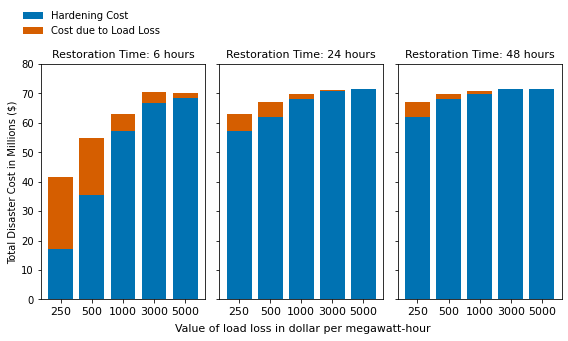

In [156]:
x = np.arange(len(voll_list))
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(8,4), sharex=False)

for i in range(3):
    
    ax[i].bar(x, bar_dict["cons_" + str(time_list[i])], color="#0072b2", label="Hardening Cost")
    ax[i].bar(x, bar_dict["voll_" + str(time_list[i])], bottom=bar_dict["cons_" + str(time_list[i])], 
              color="#d55e00", label = "Cost due to Load Loss")
    ax[i].set_xticks(x, voll_list, fontsize=11)
    if i == 0:
        ax[i].set_ylabel('Total Disaster Cost in Millions ($)')
   
    #ax[i].set_xlabel('Value of load loss in dollar per megawatt-hour')
    ax[i].set_title("Restoration Time: " + str(time_list[i]) + " hours", fontsize=11)


handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', frameon=False, bbox_to_anchor=(0.30, 0.98))

plt.tight_layout()
    
plt.text(-7.8,-11, "Value of load loss in dollar per megawatt-hour", fontsize=11)
plt.ylim(0,80)
#plt.show()
plt.savefig("/Users/ashutoshshukla/Desktop/TwoStageModel/Figures/voll_analysis.eps", format="eps", bbox_inches="tight")